<a href="https://colab.research.google.com/github/SambhavSuri/Image-Classification-Project-using-CNN/blob/main/Image_Classification_Project_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
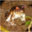

In [4]:
X_train[0]

In [5]:
X_test.shape

(10000, 32, 32, 3)

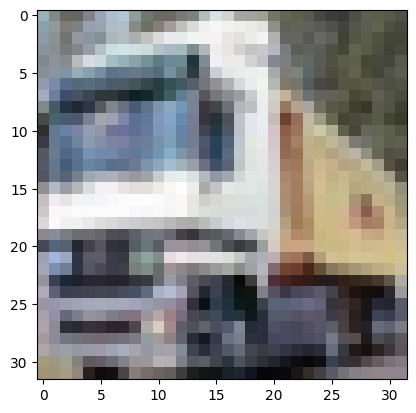

In [6]:
y_train.shape
y_train[:10]
plt.imshow(X_train[1])

In [7]:
classes = [
    'airplane' ,
    'automobile' ,
    'bird' ,
    'cat' ,
    'deer' ,
    'dog' ,
    'frog' ,
    'horse' ,
    'ship' ,
    'truck'
]
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
ann  = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )
ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3032 - loss: 1.9353
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4211 - loss: 1.6384
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4532 - loss: 1.5471
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4731 - loss: 1.4852
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4922 - loss: 1.4358


In [10]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4770 - loss: 1.4825


[1.4849201440811157, 0.4749000072479248]

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.49      0.53      1000
           1       0.42      0.77      0.55      1000
           2       0.57      0.12      0.20      1000
           3       0.41      0.18      0.25      1000
           4       0.45      0.41      0.43      1000
           5       0.36      0.49      0.42      1000
           6       0.51      0.57      0.54      1000
           7       0.54      0.53      0.54      1000
           8       0.52      0.70      0.60      1000
           9       0.50      0.49      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [12]:
cnn  = models.Sequential([

    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    #Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )
cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3948 - loss: 1.6635
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6108 - loss: 1.1243
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6603 - loss: 0.9697
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7031 - loss: 0.8610
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7275 - loss: 0.7834
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7546 - loss: 0.7118
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7668 - loss: 0.6608
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7862 - loss: 0.6131
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8019 - loss: 0.5646
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8171 - loss: 0.5250


In [13]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6976 - loss: 0.9334


[0.9389930367469788, 0.7013000249862671]

In [14]:
y_test= y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

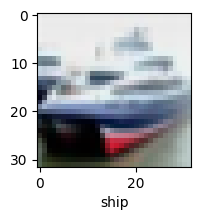

In [15]:
plot_sample(X_test,y_test,1)

In [16]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.8799801e-03, 2.2837366e-06, 8.2855038e-03, 6.2652439e-01,
        1.2068203e-04, 3.3941633e-01, 1.8864250e-02, 5.6065062e-05,
        4.7727982e-03, 7.7612545e-05],
       [3.7086353e-01, 3.7113577e-02, 1.4385268e-05, 7.7135519e-07,
        2.4961909e-07, 9.6812371e-09, 2.7511662e-08, 1.8227061e-07,
        5.7947206e-01, 1.2535273e-02],
       [7.6767914e-02, 1.9212941e-02, 1.0197782e-03, 1.3867052e-03,
        4.5740022e-04, 1.3295538e-04, 1.3584118e-04, 7.3422730e-04,
        8.8518751e-01, 1.4964653e-02],
       [8.6389297e-01, 3.2357869e-04, 5.3217267e-03, 1.4214026e-04,
        4.4354656e-05, 6.0916210e-07, 4.7682176e-04, 2.8486232e-07,
        1.2972663e-01, 7.0845294e-05],
       [1.4638233e-08, 1.9737161e-06, 5.1859524e-03, 8.6628906e-02,
        1.6853865e-03, 9.2278142e-04, 9.0556908e-01, 7.6675671e-10,
        5.9024442e-06, 8.5005236e-10]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 2, 7, 9, 6, 5, 7, 8, 6]

In [21]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)